In [1]:
import shap
import joblib
import pandas as pd
from xgboost import XGBClassifier

c:\Users\saira\Desktop\Risk-Aware Optimization\Risk_Aware_venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Load data and model
df = pd.read_csv("../data/qqq_supervised.csv", index_col=0, parse_dates=True)
model = XGBClassifier()
model.load_model("../models/day7_xgb_multi_etf_classifier.json")
scaler = joblib.load("../models/day7_xgb_scaler.pkl")

# Prepare data
feature_cols = [col for col in df.columns if col != 'Target' and not col.endswith('Return')]
X = df[feature_cols]
X_scaled = scaler.transform(X)

In [3]:
# Use TreeExplainer for XGBoost
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_scaled)

# Choose 1 example to explain
i = 100  # You can change this index
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[i], X.iloc[i])

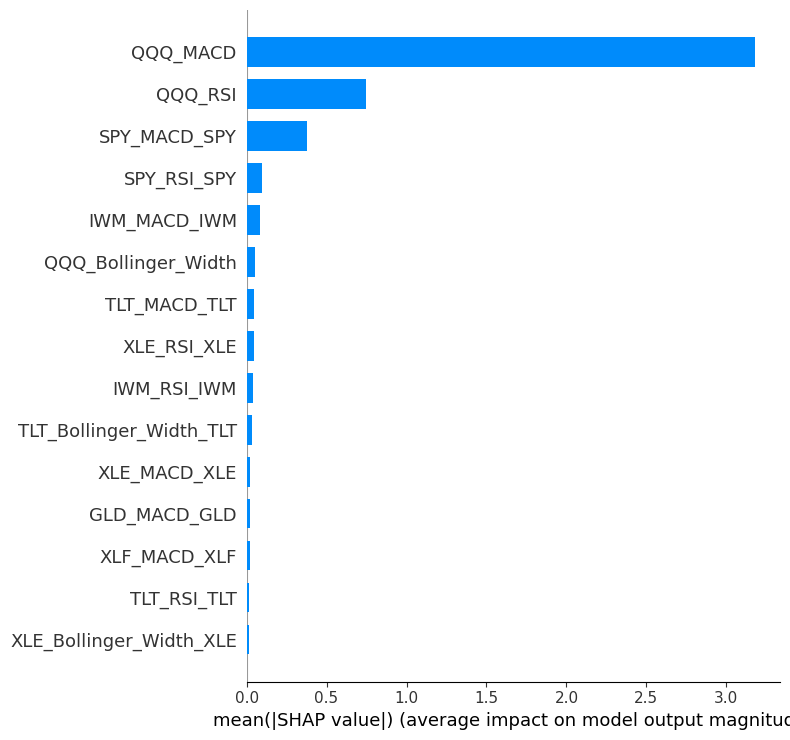

In [4]:
# Summary plot (top features globally)
shap.summary_plot(shap_values, X, plot_type="bar", max_display=15)

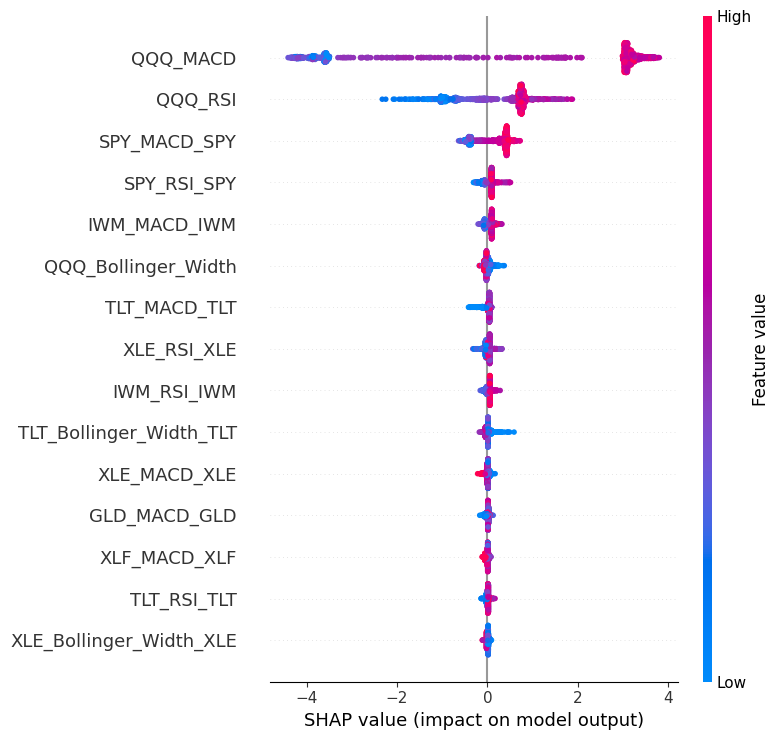

In [5]:
# More detailed view
shap.summary_plot(shap_values, X, max_display=15)